# Download the Dataset

https://www.kaggle.com/code/kredy10/simple-lstm-for-text-classification/data

# Import required library

In [1]:
from keras_preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import re
import collections
import contractions
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from statistics import mode
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import keras
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential, load_model
from keras.preprocessing.text import Tokenizer

#  Read dataset and do pre-processing 

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [5]:
df.columns = ["Category","Tweet"]
df.head()

,Category,Tweet
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.isnull().sum()

Category    0
Tweet       0
dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

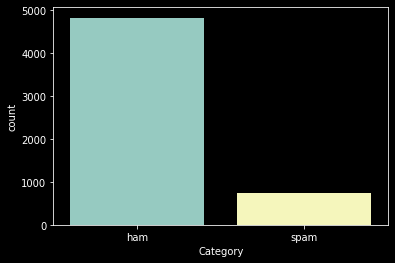

In [7]:
sns.countplot(x=df['Category'])

In [8]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
y = en.fit_transform(df["Category"])

In [9]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(df['Tweet'])
text_to_sequence = tokenizer.texts_to_sequences(df['Tweet'])

In [10]:
max_length_sequence = max([len(i) for i in text_to_sequence])
padded_sms_sequence = pad_sequences(text_to_sequence, maxlen=max_length_sequence, 
                                    padding = "pre") 
TOT_SIZE = len(tokenizer.word_index)+1

# Create Model

In [12]:
lstm_model = Sequential()

# Add Layers (LSTM, Dense-(Hidden Layers), Output)

In [13]:
lstm_model.add(Embedding(TOT_SIZE, 32, input_length=max_length_sequence))
lstm_model.add(LSTM(100))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(20, activation="relu"))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation = "sigmoid"))

In [15]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 189, 32)           285472    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 20)                2020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 340,713
Trainable params: 340,713
Non-trai

#  Compile the Model

In [16]:
lstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Fit the Model


In [17]:
lstm_model.fit(padded_sms_sequence, y, epochs = 10, validation_split=0.2, batch_size=16)

Epoch 1/10
279/279 [==============================] - 40s 133ms/step - loss: 0.1688 - accuracy: 0.9522 - val_loss: 0.0606 - val_accuracy: 0.9857
Epoch 2/10
279/279 [==============================] - 37s 131ms/step - loss: 0.0326 - accuracy: 0.9917 - val_loss: 0.0590 - val_accuracy: 0.9865
Epoch 3/10
279/279 [==============================] - 37s 132ms/step - loss: 0.0108 - accuracy: 0.9975 - val_loss: 0.0480 - val_accuracy: 0.9874
Epoch 4/10
279/279 [==============================] - 37s 132ms/step - loss: 0.0068 - accuracy: 0.9991 - val_loss: 0.0970 - val_accuracy: 0.9776
Epoch 5/10
279/279 [==============================] - 37s 131ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0762 - val_accuracy: 0.9803
Epoch 6/10
279/279 [==============================] - 37s 132ms/step - loss: 0.0055 - accuracy: 0.9993 - val_loss: 0.0489 - val_accuracy: 0.9874
Epoch 7/10
279/279 [==============================] - 37s 131ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0634 - val_ac

# Save The Model

In [18]:
lstm_model.save(r'D:\IBM Project\spam_classifier.h5')

# Test The Model

In [20]:
model=load_model(r'D:\IBM Project\spam_classifier.h5')

In [22]:
text='Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or å£1000. To claim txt DIS to 87121 18+6*å£1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1 3AJ'
text = tokenizer.texts_to_sequences(text)
max_length = max([len(i) for i in text])
padded_sms = pad_sequences(text, maxlen=max_length, 
                                    padding = "pre")


In [26]:
prediction = np.squeeze(model.predict(padded_sms))
classes_x = (prediction > 0.5).astype("int32")

mode_val=mode(classes_x)
if(mode_val==1):
      print("Ham")
else:
      print("Spam")

6/6 [==============================] - 0s 4ms/step
Spam
